Columns of the datafrane:
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
The dataframe:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672 

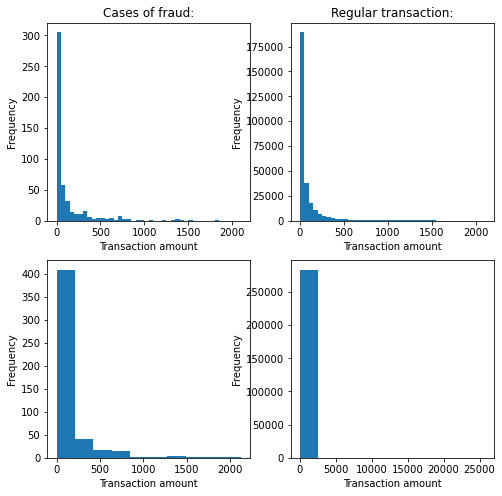

In [1]:
import pandas as pd
df=pd.read_csv('C:\Personal\ML\Projects\Credit card fraud\creditcard.csv\creditcard.csv')
df
print('Columns of the datafrane:')
print(df.columns)
print('The dataframe:')
print(df.head(5))

print('Distribution of fraud cases and non fraud cases:')
print(df['Class'].value_counts(normalize=True))

filt=df['Class']==1
print('Average and median transaction amount in case of fraud:')
print('Mean:',df.loc[filt,'Amount'].mean())
print('Median:',df.loc[filt,'Amount'].median())
print('Maximum transaction:',max(df.loc[filt,'Amount']))
print('Average and median transaction amount in case of regular transaction:')
print('Mean:',df.loc[~filt,'Amount'].mean())
print('Median:',df.loc[~filt,'Amount'].median())
print('Maximum transaction:',max(df.loc[~filt,'Amount']))

#higher transaction amount in case of fraud
#Histograms showing transaction distribution in case of fraud and regular

import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
bin_edges=range(0,int(max(df.loc[filt,'Amount'])+1),50)
plt.subplot(2,2,1)
plt.hist(df.loc[filt,'Amount'],bins=bin_edges)
plt.xlabel('Transaction amount')
plt.ylabel('Frequency')
plt.title('Cases of fraud:')


#for regular transaction
plt.subplot(2,2,2)
plt.hist(df.loc[~filt,'Amount'],bins=bin_edges)
plt.xlabel('Transaction amount')
plt.ylabel('Frequency')
plt.title('Regular transaction:')

plt.subplot(2,2,3)
plt.hist(df.loc[filt,'Amount'])
plt.xlabel('Transaction amount')
plt.ylabel('Frequency')


plt.subplot(2,2,4)
plt.hist(df.loc[~filt,'Amount'])
plt.xlabel('Transaction amount')
plt.ylabel('Frequency')
plt.show()


Columns having na values:
[]


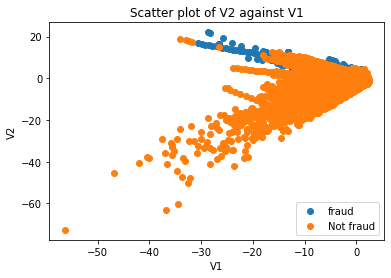

Correlation matrix of the dataset:
Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64
Numeric columns of dataframe:
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Dtype of class:
int64


In [2]:
print('Columns having na values:')
print(df.columns[df.isna().any()].tolist())

plt.scatter(df.loc[filt,'V1'],df.loc[filt,'V2'],label='fraud')
plt.scatter(df.loc[~filt,'V1'],df.loc[~filt,'V2'],label='Not fraud')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Scatter plot of V2 against V1')
plt.legend(loc='lower right')
plt.show()

df_corr=df.corr()
print('Correlation matrix of the dataset:')
print(df_corr['Class'])

import numpy as np
num_df=df.select_dtypes(include=[np.number])
print('Numeric columns of dataframe:')
print(num_df.columns)

print('Dtype of class:')
print(df['Class'].dtype)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['Time','Amount']]=scaler.fit_transform(df[['Time','Amount']])

Optimal k value on analyzing silhouette scores:
3
Cluster centers are:
[[ 0.70862609 -0.99450763 -0.01744754 -0.10478212  0.06979983 -0.20082487
  -0.06861289  0.12132506 -0.07274331]
 [-1.70706349 -0.1269376   0.14440126  0.01965752 -0.07651387  0.09363848
  -0.01195043 -0.0488359   0.11037651]
 [ 0.72703723  1.36177271 -0.11456732  0.11228622 -0.01491319  0.16236247
   0.09696604 -0.10539194 -0.01338691]]
Labels of the instances are:
[2 2 2 0 2 0 2 0 0 0]


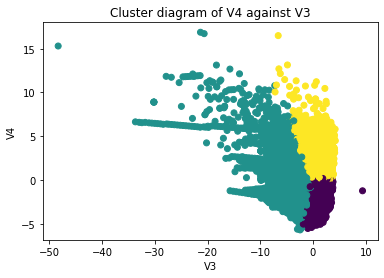

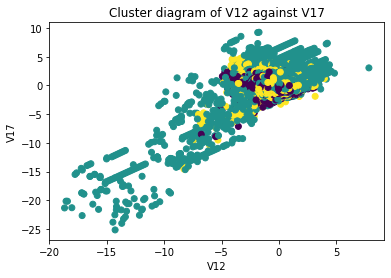

Visualizing clusters by scaling down using PCA
Transformed dataset:
[[ 1.57156852 -0.67555571]
 [-1.08625314 -0.28270879]
 [ 2.05331931  1.0776561 ]
 [ 1.15014728 -0.4274782 ]
 [ 1.14391038 -1.34211013]]
Variance ratio, distribution of variance along each principal component:
[0.12088206 0.09654333]
Cluster centers after scaling down using PCA:
[[ 0.80165712 -1.12445428]
 [-1.72022296  1.1752353 ]
 [ 2.53490907  2.09144069]
 [-0.80106442  0.04780639]
 [24.03736841 21.29464048]
 [ 7.78863783  7.25454428]
 [ 4.98816376 -4.20152811]]


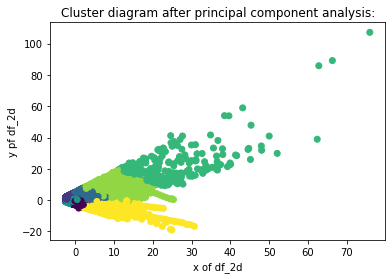

In [3]:

df_cred=df.drop(columns=['Class'])
#using clustering algorithms to explore PCA reduced attributes
from sklearn.model_selection import train_test_split



import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
df1=df_cred[['V3','V4','V7','V10','V11','V12','V14','V16','V17']]#columns chosen on basis of correlation coefficient
k_values=range(2,11)
k_optimal=3#optimal k value having max siilhouette score

print('Optimal k value on analyzing silhouette scores:')
print(k_optimal)
kmeans=KMeans(n_clusters=k_optimal,random_state=42,n_init=10)
kmeans.fit(df1)

print('Cluster centers are:')
print(kmeans.cluster_centers_)#cluster centers have as many dimensions os input dataframe

print('Labels of the instances are:')
print(kmeans.labels_[:10])
import matplotlib.pyplot as plt

plt.scatter(df_cred['V3'],df_cred['V4'],c=kmeans.labels_)
plt.xlabel('V3')
plt.ylabel('V4')
plt.title('Cluster diagram of V4 against V3')
plt.show()

plt.scatter(df_cred['V12'],df_cred['V17'],c=kmeans.labels_)
plt.xlabel('V12')
plt.ylabel('V17')
plt.title('Cluster diagram of V12 against V17')
plt.show()

print('Visualizing clusters by scaling down using PCA')
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
df_2d=pca.fit_transform(df_cred)
print('Transformed dataset:')
print(df_2d[:5])

print('Variance ratio, distribution of variance along each principal component:')
print(pca.explained_variance_ratio_)

kmeans=KMeans(n_clusters=7,random_state=42,n_init=10)
kmeans.fit(df_2d)


print('Cluster centers after scaling down using PCA:')
print(kmeans.cluster_centers_)
plt.scatter(df_2d[:,0],df_2d[:,1],c=kmeans.labels_)
plt.xlabel('x of df_2d')
plt.ylabel('y pf df_2d')
plt.title('Cluster diagram after principal component analysis:')
plt.show()

In [4]:
#ANOMALY DETECTION
from sklearn.ensemble import IsolationForest
x_train,x_test=train_test_split(df,test_size=0.2,random_state=42)
print('Class distribution of x_train dataset:')
print(x_train['Class'].value_counts(normalize=True))

x_train['Class'].replace(1,-1,inplace=True)
x_train['Class'].replace(0,1,inplace=True)
x_test['Class'].replace(1,-1,inplace=True)
x_test['Class'].replace(0,1,inplace=True)
x_train_class=x_train['Class']
x_test_class=x_test['Class']
x_train.drop(columns=['Class'],inplace=True)
x_test.drop(columns=['Class'],inplace=True)

print('Unique values of x_train Class')
print(x_train_class.unique())

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
param_grid={'n_estimators':[100,200,300],
           'max_samples':[0.2,0.5,0.8,1.0],
            'max_features':[0.5,0.8,1.0]}
#max_features represents number of features considered for each split
#max_samples represents the number of samples considered while building tree
isolation=IsolationForest(contamination=0.001729,random_state=42)
grid_isolation=RandomizedSearchCV(isolation,param_distributions=param_grid,n_iter=3,cv=3,scoring='f1',error_score='raise')
grid_isolation.fit(x_train,x_train_class)

print('Optimized hyperparameters for isolation forest:')
print(grid_isolation.best_params_)


Class distribution of x_train dataset:
0    0.998271
1    0.001729
Name: Class, dtype: float64
Unique values of x_train Class
[ 1 -1]
Optimized hyperparameters for isolation forest:
{'n_estimators': 200, 'max_samples': 0.8, 'max_features': 1.0}


Distribution of values(anomaly classification) for test set
 1    56872
-1       90
dtype: int64
Precision score of the isolation forest:
0.9988746659164439
Recall score of isolation forest:
0.9990151941474396
F1 score of isolation forest:
0.9989449250896814
Decision function of isolation forest:
[-0.14243135  0.1816521   0.20088285  0.19954893  0.20268264  0.1818009
  0.20591455  0.19749048  0.20047543  0.16037874]
Precision recall curve on test set(considering threshold):


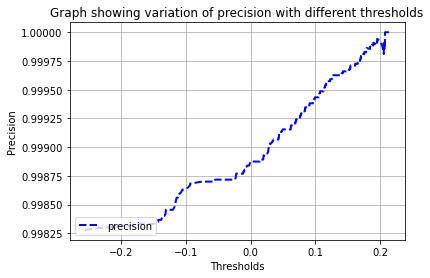

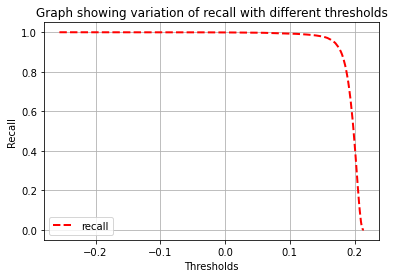

Minimum and maximum values of precisions and recalls
For precisions:
0.9982795547909132
1.0
For recalls:
0.0
1.0
precision drawn against recall:


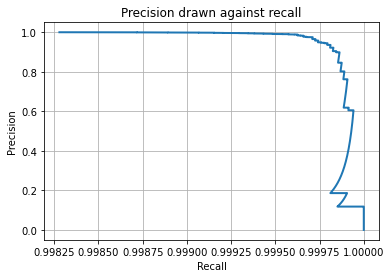

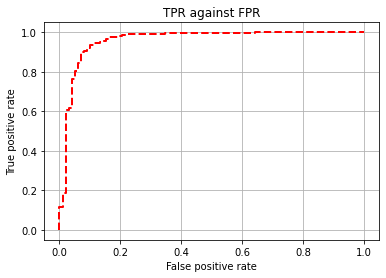

The area under roc curve is:
0.9595971196582178
Confusion matrix
Result of confusion matrix:
[[   34    64]
 [   56 56808]]


In [5]:
best_model=grid_isolation.best_estimator_
y_pred=best_model.predict(x_test)
print('Distribution of values(anomaly classification) for test set')
print(pd.Series(y_pred).value_counts())

from sklearn.metrics import precision_score,recall_score,f1_score

print('Precision score of the isolation forest:')
print(precision_score(x_test_class,y_pred))

print('Recall score of isolation forest:')
print(recall_score(x_test_class,y_pred))

print('F1 score of isolation forest:')
print(f1_score(x_test_class,y_pred))

y_scores=best_model.decision_function(x_test)#selects model having best hyperparameters
print('Decision function of isolation forest:')
print(y_scores[:10])


from sklearn.metrics import precision_recall_curve,roc_curve,auc
precisions,recalls, thresholds=precision_recall_curve(x_test_class,y_scores)
print('Precision recall curve on test set(considering threshold):')
import matplotlib.pyplot as plt
plt.plot(thresholds,precisions[:-1],'b--',linewidth=2,label='precision')
plt.grid(True)
plt.xlabel("Thresholds")
plt.ylabel('Precision')
plt.title('Graph showing variation of precision with different thresholds')
plt.legend(loc='lower left')
plt.show()

plt.plot(thresholds,recalls[:-1],'r--',linewidth=2,label='recall')
plt.grid(True)
plt.xlabel("Thresholds")
plt.ylabel('Recall')
plt.title('Graph showing variation of recall with different thresholds')
plt.legend(loc='lower left')
plt.show()

print('Minimum and maximum values of precisions and recalls')
print('For precisions:')
print(min(precisions))
print(max(precisions))
print('For recalls:')
print(min(recalls))
print(max(recalls))

print('precision drawn against recall:')
plt.plot(precisions,recalls,linewidth=2)
plt.grid(True)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision drawn against recall')
plt.show()

#auc_pr=auc(precisions,recalls)
#print('AUC PR score:',auc_pr)

#ROC curve
fpr,tpr,thresholds=roc_curve(x_test_class,y_scores)#returns fpr and tpr for all possible thresholds
plt.plot(fpr,tpr,'r--',linewidth=2,label='tpr')
plt.grid(True)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('TPR against FPR')
plt.show()
#roc curve tells us how effective model is at identifying classes
#higher x values(fpr) means model mistakes a lot of instances from negative class to be positive class
#higher y value(tpr) means model correctly identifies a lot of positive instances
##higher area under curve means model is excellent at distinguishing classes

from sklearn.metrics import roc_auc_score
print('The area under roc curve is:')
print(roc_auc_score(x_test_class,y_scores))

print('Confusion matrix')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(x_test_class,y_pred)
print('Result of confusion matrix:')
print(cm)

In [6]:
import numpy as np
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import LocalOutlierFactor
x_train,x_test=train_test_split(df,test_size=0.2,random_state=42)
x_train,x_val=train_test_split(x_train,test_size=0.2,random_state=42)

param_grid={'n_neighbors':[6,10,15,20]}
print('Distribution of class values in the training set:')
print(x_train['Class'].value_counts(normalize=True))

x_train_class=x_train['Class']
x_val_class=x_val['Class']
x_test_class=x_test['Class']
x_train.drop(columns=['Class'],inplace=True)
x_val.drop(columns=['Class'],inplace=True)
x_test.drop(columns=['Class'],inplace=True)

x_train_class.replace(1,-1,inplace=True)
x_train_class.replace(0,1,inplace=True)
x_val_class.replace(1,-1,inplace=True)
x_val_class.replace(0,1,inplace=True)
x_test_class.replace(1,-1,inplace=True)
x_test_class.replace(0,1,inplace=True)


import warnings
warnings.filterwarnings("ignore", category=UserWarning)
#above replaces assignment metric in the format of the output given by anomaly detector algorithm
lof=LocalOutlierFactor(contamination=0.00181,n_neighbors=10,novelty=True)
lof.fit(x_train)

train_pred=lof.predict(x_train)
print('Value distribution of x_train predictions:')
print(pd.Series(train_pred).value_counts(normalize=True))

Distribution of class values in the training set:
0    0.99819
1    0.00181
Name: Class, dtype: float64
Value distribution of x_train predictions:
 1    0.998607
-1    0.001393
dtype: float64


Distribution of values(Local Outlier Factor) for test set
 1    56850
-1      112
dtype: int64
Precision score of the Local Outlier Factor:
0.9982761653474055
Recall score of Local Outlier Factor:
0.998030388294879
F1 score of Local Outlier Factor:
0.9981532616916122
Decision function of Local Outlier Factor:
[3.43792071 3.42309661 3.42275549 3.45139154 3.52879824 3.5544971
 3.48773613 3.36190069 3.53598404 3.28943093]
Local Outlier Factor evaluation metrics
Precision recall curve on test set(considering threshold):


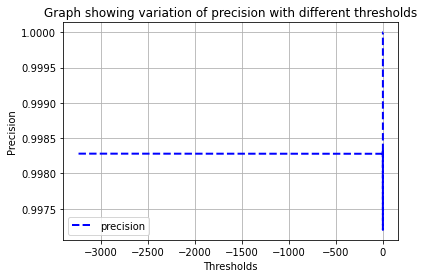

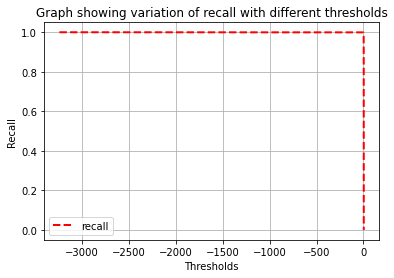

Minimum and maximum values of precisions and recalls
For precisions:
0.9971988795518207
1.0
For recalls:
0.0
1.0
precision drawn against recall:


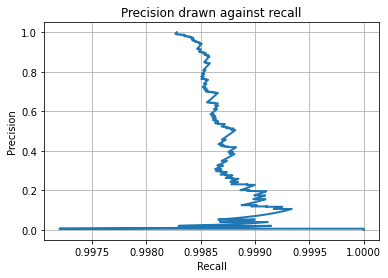

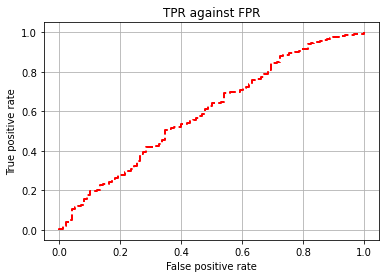

The area under roc curve is:
0.5958362523399906
Confusion matrix
Result of confusion matrix:
[[    0    98]
 [  112 56752]]


In [7]:
y_pred=lof.predict(x_test)
print('Distribution of values(Local Outlier Factor) for test set')
print(pd.Series(y_pred).value_counts())

from sklearn.metrics import precision_score,recall_score,f1_score

print('Precision score of the Local Outlier Factor:')
print(precision_score(x_test_class,y_pred))

print('Recall score of Local Outlier Factor:')
print(recall_score(x_test_class,y_pred))

print('F1 score of Local Outlier Factor:')
print(f1_score(x_test_class,y_pred))

y_scores=lof.decision_function(x_test)#selects model having best hyperparameters
print('Decision function of Local Outlier Factor:')
print(y_scores[:10])

print('Local Outlier Factor evaluation metrics')
from sklearn.metrics import precision_recall_curve,roc_curve,auc
precisions,recalls, thresholds=precision_recall_curve(x_test_class,y_scores)
print('Precision recall curve on test set(considering threshold):')
import matplotlib.pyplot as plt
plt.plot(thresholds,precisions[:-1],'b--',linewidth=2,label='precision')
plt.grid(True)
plt.xlabel("Thresholds")
plt.ylabel('Precision')
plt.title('Graph showing variation of precision with different thresholds')
plt.legend(loc='lower left')
plt.show()

plt.plot(thresholds,recalls[:-1],'r--',linewidth=2,label='recall')
plt.grid(True)
plt.xlabel("Thresholds")
plt.ylabel('Recall')
plt.title('Graph showing variation of recall with different thresholds')
plt.legend(loc='lower left')
plt.show()

print('Minimum and maximum values of precisions and recalls')
print('For precisions:')
print(min(precisions))
print(max(precisions))
print('For recalls:')
print(min(recalls))
print(max(recalls))

print('precision drawn against recall:')
plt.plot(precisions,recalls,linewidth=2)
plt.grid(True)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision drawn against recall')
plt.show()

#auc_pr=auc(precisions,recalls)
#print('AUC PR score:',auc_pr)

#ROC curve
fpr,tpr,thresholds=roc_curve(x_test_class,y_scores)#returns fpr and tpr for all possible thresholds
plt.plot(fpr,tpr,'r--',linewidth=2,label='tpr')
plt.grid(True)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('TPR against FPR')
plt.show()
#roc curve tells us how effective model is at identifying classes
#higher x values(fpr) means model mistakes a lot of instances from negative class to be positive class
#higher y value(tpr) means model correctly identifies a lot of positive instances
##higher area under curve means model is excellent at distinguishing classes

from sklearn.metrics import roc_auc_score
print('The area under roc curve is:')
print(roc_auc_score(x_test_class,y_scores))

print('Confusion matrix')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(x_test_class,y_pred)
print('Result of confusion matrix:')
print(cm)

In [8]:
from sklearn.svm import OneClassSVM
from sklearn.model_selection import RandomizedSearchCV
x_train,x_test=train_test_split(df,test_size=0.2,random_state=42)

print('Distribution of class values in the training set:')
print(x_train['Class'].value_counts(normalize=True))

x_train_class=x_train['Class']
x_test_class=x_test['Class']
x_train.drop(columns=['Class'],inplace=True)
x_test.drop(columns=['Class'],inplace=True)

x_train_class.replace(1,-1,inplace=True)
x_train_class.replace(0,1,inplace=True)
x_test_class.replace(1,-1,inplace=True)
x_test_class.replace(0,1,inplace=True)
#replacing these values in the format of the anomaly detection output

param_grid ={
    'kernel': ['rbf','linear','poly','sigmoid'],
    'gamma': ['scale','auto',0.1,1,10]
}

#optimal_model = OneClassSVM(**best_params)
#optimal_model.fit(x_train)

Distribution of class values in the training set:
0    0.998271
1    0.001729
Name: Class, dtype: float64


In [ ]:
svm=OneClassSVM(nu=0.001729,kernel='poly')
svm.fit(x_train)

train_pred=svm.predict(x_train)
print('Value distribution of x_train predictions for OneClassSVM:')
print(pd.Series(train_pred).value_counts(normalize=True))

y_pred=svm.predict(x_test)
print('Distribution of values(OneClassSVM) for test set')
print(pd.Series(y_pred).value_counts())

from sklearn.metrics import precision_score,recall_score,f1_score

print('Precision score of the OneClassSVM:')
print(precision_score(x_test_class,y_pred))

print('Recall score of OneClassSVM:')
print(recall_score(x_test_class,y_pred))

print('F1 score of OneClassSVM:')
print(f1_score(x_test_class,y_pred))

y_scores=svm.decision_function(x_test)#selects model having best hyperparameters
print('Decision function of OneClassSVM:')
print(y_scores[:10])

print('OneClassSVM evaluation metrics')
from sklearn.metrics import precision_recall_curve,roc_curve,auc
precisions,recalls, thresholds=precision_recall_curve(x_test_class,y_scores)
print('Precision recall curve on test set(considering threshold):')
import matplotlib.pyplot as plt
plt.plot(thresholds,precisions[:-1],'b--',linewidth=2,label='precision')
plt.grid(True)
plt.xlabel("Thresholds")
plt.ylabel('Precision')
plt.title('Graph showing variation of precision with different thresholds')
plt.legend(loc='lower left')
plt.show()

plt.plot(thresholds,recalls[:-1],'r--',linewidth=2,label='recall')
plt.grid(True)
plt.xlabel("Thresholds")
plt.ylabel('Recall')
plt.title('Graph showing variation of recall with different thresholds')
plt.legend(loc='lower left')
plt.show()

print('Minimum and maximum values of precisions and recalls')
print('For precisions:')
print(min(precisions))
print(max(precisions))
print('For recalls:')
print(min(recalls))
print(max(recalls))

print('precision drawn against recall:')
plt.plot(precisions,recalls,linewidth=2)
plt.grid(True)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision drawn against recall')
plt.show()

#auc_pr=auc(precisions,recalls)
#print('AUC PR score:',auc_pr)

#ROC curve
fpr,tpr,thresholds=roc_curve(x_test_class,y_scores)#returns fpr and tpr for all possible thresholds
plt.plot(fpr,tpr,'r--',linewidth=2,label='tpr')
plt.grid(True)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('TPR against FPR')
plt.show()
#roc curve tells us how effective model is at identifying classes
#higher x values(fpr) means model mistakes a lot of instances from negative class to be positive class
#higher y value(tpr) means model correctly identifies a lot of positive instances
##higher area under curve means model is excellent at distinguishing classes

from sklearn.metrics import roc_auc_score
print('The area under roc curve is:')
print(roc_auc_score(x_test_class,y_scores))

print('Confusion matrix')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(x_test_class,y_pred)
print('Result of confusion matrix:')
print(cm)